# Categorical Feature Encoding Project  
진행 기간: '22.07.04 start  
이 프로젝트는 범주형 변수들을 활용하여, target이라는 binary variable(이진 변수)을 예측하는 프로젝트이다.  
target은 0, 1로 되어 있으므로 **Classification의 문제**이다.  

---
### 변수 설명
- `id`(=index)
- 이진 변수들: `bin_*` 5개 / 순서 X 범주형 변수
- 명목형 변수들: `nom_*` 10개 / 순서 X 범주형 변수
- 순서형 변수들: `ord_*` 6개 / 순서 O 범주형 변수 
    - ord_3~5: 아스키 문자(ascii letters) 즉 알파벳으로 되어 있다 
- day : 요일(1은 월요일~ 7은 일요일)
- month: 월  

---
### EDA 순서
0. EDA 전 데이터 점검
1. target 분포 
2. `bin_*` 분포 & target과 관계
3. `nom_*` 분포 & target과 관계
4. `ord_*` 분포 & target과 관계
5. `day, month` 분포 & target과 관계

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv', index_col = 'id')
test = pd.read_csv('test.csv', index_col = 'id')

train.head()

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,T,Y,Green,Triangle,Snake,Finland,Bassoon,...,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2,0
1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,Piano,...,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8,0
2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,Theremin,...,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2,0
3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,Oboe,...,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1,1
4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,Oboe,...,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8,0


In [3]:
test.head()

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
id,,,,,,,,,,,,,,,,,,,,,
300000,0,0,1,T,Y,Blue,Triangle,Axolotl,Finland,Piano,...,9d117320c,3c49b42b8,2,Novice,Warm,j,P,be,5,11
300001,0,0,0,T,N,Red,Square,Lion,Canada,Piano,...,46ae3059c,285771075,1,Master,Lava Hot,l,A,RP,7,5
300002,1,0,1,F,Y,Blue,Square,Dog,China,Piano,...,b759e21f0,6f323c53f,2,Expert,Freezing,a,G,tP,1,12
300003,0,0,1,T,Y,Red,Star,Cat,China,Piano,...,0b6ec68ff,b5de3dcc4,1,Contributor,Lava Hot,b,Q,ke,2,3
300004,0,1,1,F,N,Red,Trapezoid,Dog,China,Piano,...,f91f3b1ee,967cfa9c9,3,Grandmaster,Lava Hot,l,W,qK,4,11


In [4]:
print(train.shape, test.shape)

(300000, 24) (200000, 23)


In [5]:
train.columns

Index(['bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4', 'nom_0', 'nom_1', 'nom_2',
       'nom_3', 'nom_4', 'nom_5', 'nom_6', 'nom_7', 'nom_8', 'nom_9', 'ord_0',
       'ord_1', 'ord_2', 'ord_3', 'ord_4', 'ord_5', 'day', 'month', 'target'],
      dtype='object')

In [6]:
# 열을 행으로, 행을 열로 전치시켜 데이터를 반환. 그래서 열을 보면 초반 5개 데이터만 나옴
train.head().T

id,0,1,2,3,4
bin_0,0,0,0,0,0
bin_1,0,1,0,1,0
bin_2,0,0,0,0,0
bin_3,T,T,F,F,F
bin_4,Y,Y,Y,Y,N
nom_0,Green,Green,Blue,Red,Red
nom_1,Triangle,Trapezoid,Trapezoid,Trapezoid,Trapezoid
nom_2,Snake,Hamster,Lion,Snake,Lion
nom_3,Finland,Russia,Russia,Canada,Canada
nom_4,Bassoon,Piano,Theremin,Oboe,Oboe


## 0. EDA 전 데이터 점검
- 중복 
- 결측치

In [7]:
# 중복 데이터가 있는가?
train.duplicated().sum()

0

In [8]:
test.duplicated().sum()

0

In [9]:
# 결측치가 있는가?
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300000 entries, 0 to 299999
Data columns (total 24 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   bin_0   300000 non-null  int64 
 1   bin_1   300000 non-null  int64 
 2   bin_2   300000 non-null  int64 
 3   bin_3   300000 non-null  object
 4   bin_4   300000 non-null  object
 5   nom_0   300000 non-null  object
 6   nom_1   300000 non-null  object
 7   nom_2   300000 non-null  object
 8   nom_3   300000 non-null  object
 9   nom_4   300000 non-null  object
 10  nom_5   300000 non-null  object
 11  nom_6   300000 non-null  object
 12  nom_7   300000 non-null  object
 13  nom_8   300000 non-null  object
 14  nom_9   300000 non-null  object
 15  ord_0   300000 non-null  int64 
 16  ord_1   300000 non-null  object
 17  ord_2   300000 non-null  object
 18  ord_3   300000 non-null  object
 19  ord_4   300000 non-null  object
 20  ord_5   300000 non-null  object
 21  day     300000 non-null  int64 
 

인위적으로 만든 데이터라 그런지, 중복 및 결측치가 없다.  
바로 EDA로 넘어가자!  

## 1. target
target의 분포를 확인하자. 이는 데이터의 불균형 상태를 알아보기 위해 중요하다.

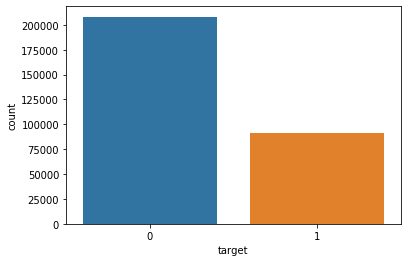

In [10]:
ax = sns.countplot(x = 'target', data = train)
plt.show()

- target 분포는 0이 더 많다. 0이 약 20만 개, 1은 약 10만 개
- 그런데 이렇게 보면 비율이 와닿지 않으므로 직접 비율을 구해서 그래프 위에 써 주자!

In [11]:
# 이를 위해서 ax.patches를 이용한다.
# patches 메서드를 통해 불러온 것은 2개의 사각형 객체 각각을 가리킴 
ax.patches

In [12]:
# 여기서 target이 0인 왼쪽 사각형에 대해서만 먼저 해보자! 
rec = ax.patches[0]
    # 각각 왼쪽 사각형의 높이(개수), 가로길이, 왼쪽 테두리의 x축 
print(rec.get_height(), rec.get_width(), rec.get_x())

208236 0.8 -0.4


In [13]:
# 비율을 써줄 텍스트는 왼쪽 사각형의 바로 위에 써줄 것이다

print('x좌표: ', rec.get_x() + rec.get_width()/2)
print('y좌표: ', rec.get_height() + len(train)*0.01)
print('target=0의 비율: ', (rec.get_height()/len(train))*100, '%')

x좌표:  0.0
y좌표:  211236.0
target=0의 비율:  69.41199999999999 %


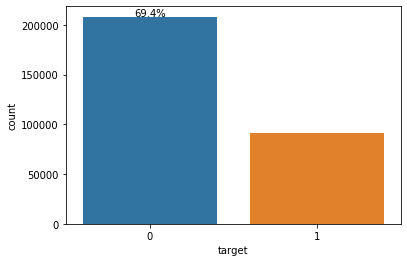

In [14]:
# 적용
ax = sns.countplot(x = 'target', data = train)
ax.text(x = rec.get_x() + rec.get_width()/2,
            y = rec.get_height() + len(train)*0.001,
            s =  '{0:.1f}%'.format((rec.get_height()/len(train))*100),
           ha = 'center')

plt.rc('font', size = 13)
plt.show()

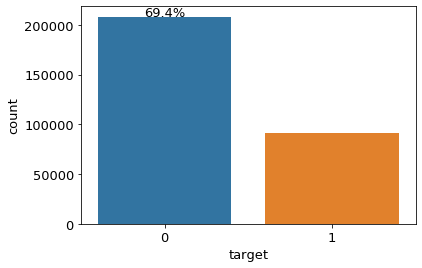

In [15]:
# f-string 써주기 
ax = sns.countplot(x = 'target', data = train)
ax.text(x = rec.get_x() + rec.get_width()/2,
            y = rec.get_height() + len(train)*0.001,
            s =  f'{(rec.get_height()/len(train))*100 :1.1f}%',
           ha = 'center')

plt.rc('font', size = 13)
plt.show()

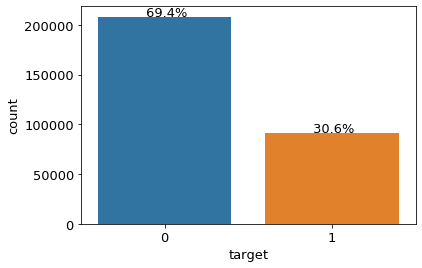

In [16]:
# 이제 target == 1에 대해서도 해주자 (for문으로 연결)
ax = sns.countplot(x = 'target', data = train)

for patch in ax.patches:
    # 2개의 patch 값을 가짐
    ax.text(x = patch.get_x() + patch.get_width()/2,
               y = patch.get_height() + len(train)*0.001,
               s = f'{(patch.get_height()/len(train))*100: 1.1f}%',
               ha = 'center')
    
plt.rc('font', size = 13)
plt.show()

이렇게 비율을 써주니 target의 0과 1의 비율은 `7:3`으로, 1의 개수가 좀 적은 불균형 데이터(imbalanced data)라고 할 수 있다.

In [17]:
# 나중에도 쓸 것이므로 함수로 저장

def write_text(ax, total_size):
    for patch in ax.patches:
        ax.text(x = patch.get_x() + patch.get_width()/2,
                  y = patch.get_height() + total_size*0.001,
               s = f'{(patch.get_height()/total_size)*100: 1.1f}%', #소수점 1자리까지만 
               ha = 'center')

## 2. bin_* 변수
이 변수는 0,1 / T,F / Y,N 이렇게 2개의 값만 갖는 이진변수

In [18]:
train_b = train[['bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4', 'target']]
train_b.head()

,bin_0,bin_1,bin_2,bin_3,bin_4,target
id,,,,,,
0,0,0,0,T,Y,0
1,0,1,0,T,Y,0
2,0,0,0,F,Y,0
3,0,1,0,F,Y,1
4,0,0,0,F,N,0


In [19]:
# 아니면 열 이름이 모두 bin 어쩌구니까 이런 식으로 만들어도 된다!
list1 = list()
for i in range(0, 5):
    list1.append('bin_{0}'.format(i))

list1

['bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4']

In [20]:
train[list1]

,bin_0,bin_1,bin_2,bin_3,bin_4
id,,,,,
0,0,0,0,T,Y
1,0,1,0,T,Y
2,0,0,0,F,Y
3,0,1,0,F,Y
4,0,0,0,F,N
...,...,...,...,...,...
299995,0,0,0,T,N
299996,0,0,0,F,Y
299997,0,0,0,F,Y


각 열별 고유한 값으로는 무엇을 갖고 있는지 알아보자

In [21]:
for ind, col in enumerate(train_b.columns):
    print(col, '의 고유한 값은' ,train_b[col].unique())

bin_0 의 고유한 값은 [0 1]
bin_1 의 고유한 값은 [0 1]
bin_2 의 고유한 값은 [0 1]
bin_3 의 고유한 값은 ['T' 'F']
bin_4 의 고유한 값은 ['Y' 'N']
target 의 고유한 값은 [0 1]


대부분 0, 1의 값이지만 
    - bin_3의 T/F는 1, 0으로
    - bin_4의 Y/N은 1,0으로 추후 머신러닝 모델에 넣을때 인코딩한다. (ML 모델은 숫자만 인식하기 때문)  
    
### 2-1. `bin_*` 변수의 각 고유값별 비율

In [22]:
list1

['bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4']

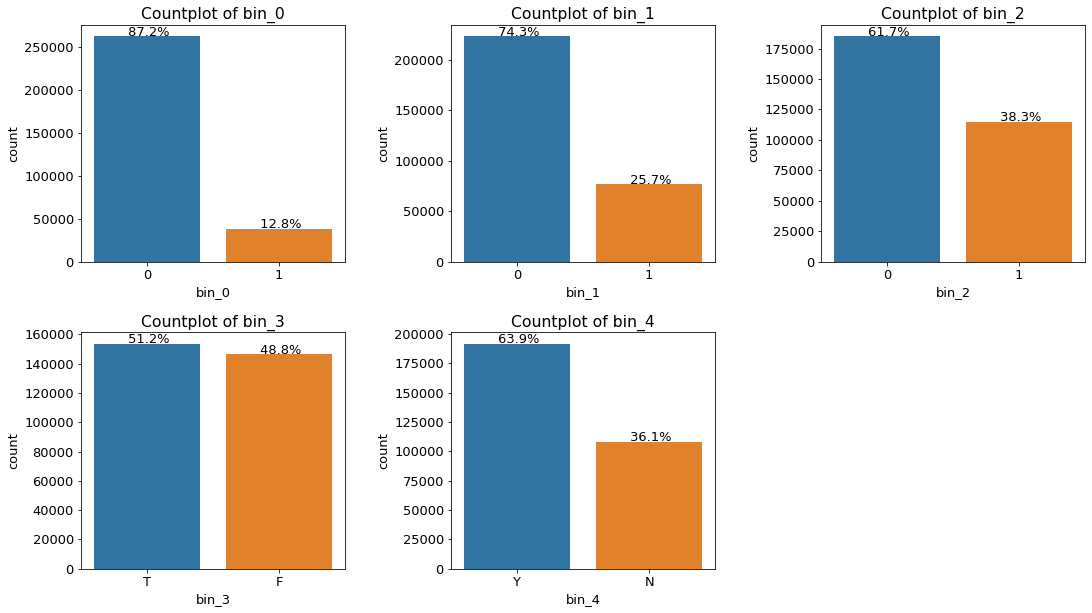

In [23]:
# 각 피처별 고유값의 비율 시각화 
## gridspec을 활용하면 몇 행 몇 열의 그래프를 지정해줄 수 있다. grid를 인덱싱해서!
import matplotlib.gridspec as gridspec

plt.figure(figsize = (18, 10))
plt.subplots_adjust(wspace = 0.4, hspace = 0.3) #각 ax별 간격 (w: 좌우, h: 상하 여백)
grid = gridspec.GridSpec(2, 3)

for ind, col in enumerate(list1):
    # 특정 ax에 그래프를 그림
    ax = plt.subplot(grid[ind])
    sns.countplot(x = col, data = train, ax = ax)
    
    #text는 앞에서 만든 함수 활용
    write_text(ax, len(train))
    
    # 각 ax에 제목 달아주기
    ax.set_title(f'Countplot of {col}')

plt.rc('font', size = 12)
plt.show()

#### 해석
- target, bin_0, bin_1, bin_2는 모두 `0과 1`의 값을 갖고 있으며, 0이 압도적으로 많다.
- bin_3은 `T/F`의 값을 갖고 있으며 두 개수는 비슷하다.(T가 조금 더 많다)
- bin_4는 `Y/N`의 값을 갖고 있으며 Y가 더 많다.  

### 2-2. `bin_*` 변수와 target 간 관계
이번에는 bin_* 들과 target 간의 관계를 확인할 수 있는 그래프를 그려보자.

In [24]:
target0 = train_b.loc[train_b['target']==0]
target1 = train_b.loc[train_b['target']==1]

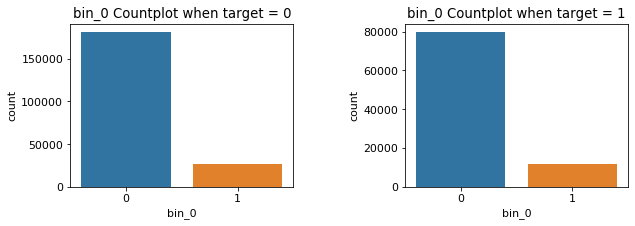

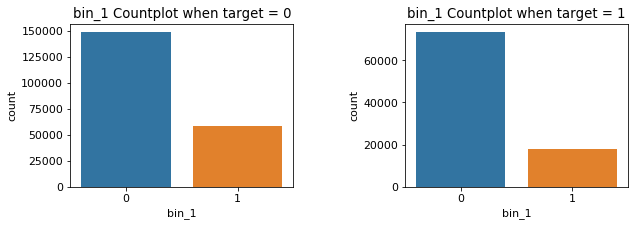

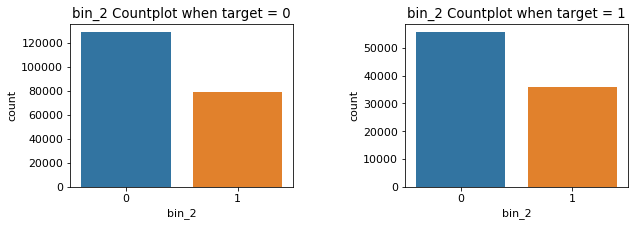

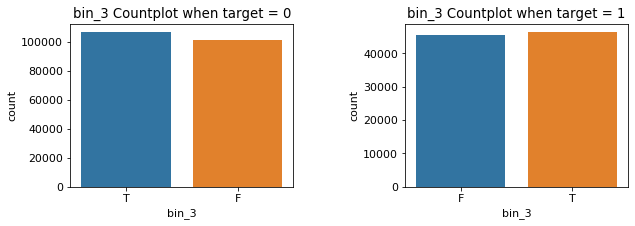

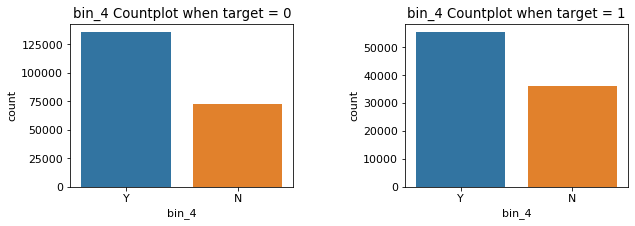

In [25]:
# bin_*별, 왼쪽은 target =0, 오른쪽은 target = 1 그래프 
plt.rc('font', size = 11)

# bin_* 의 * 숫자값을 i로 둔다 
for i in range(0,5):
    fig,ax = plt.subplots(1, 2, figsize = (10, 3))
    plt.subplots_adjust(wspace=0.5) #두 plot 간 사이 거리 설정 
    ax[0] = sns.countplot(x = 'bin_{0}'.format(i), data = target0, ax = ax[0]).set_title('bin_{0} Countplot when target = 0'.format(i))
    ax[1] = sns.countplot(x = 'bin_{0}'.format(i), data = target1, ax = ax[1]).set_title('bin_{0} Countplot when target = 1'.format(i))
    plt.show()

위의 그림도 나쁘진 않지만, `bin_*` 별로 그래프가 단 1개씩만 존재하도록 그리면 더 보기 편할 것 같다.  
즉, 여기선 bin_0의 그래프가 target이 0 / 1에 따라 2개의 그래프가 그려졌지만, 이걸 1개의 그래프로 만들어보자!  
-> seaborn의 `hue 옵션`을 **target**으로!

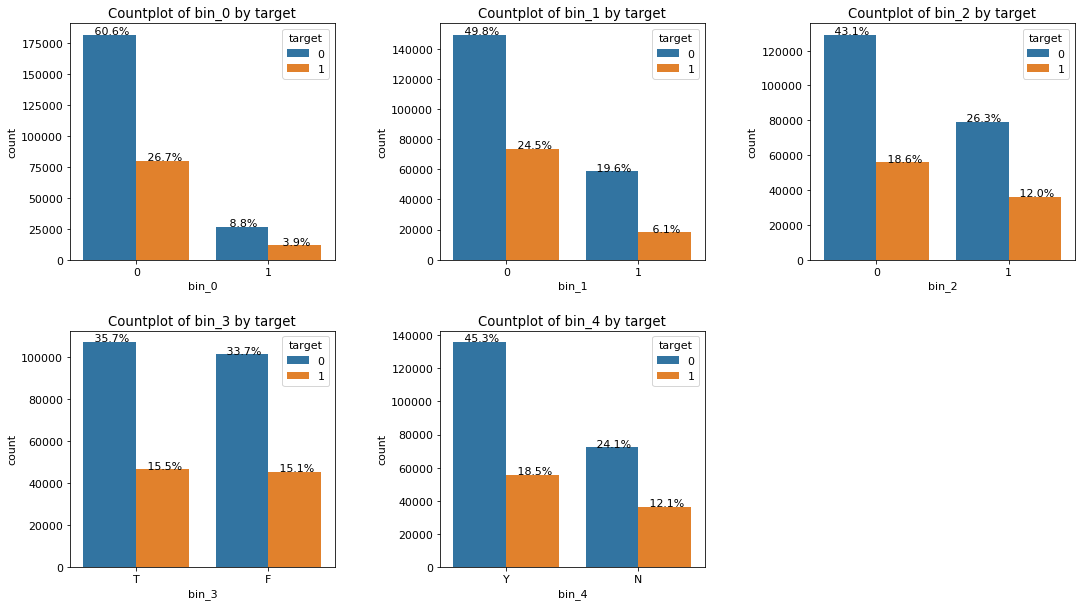

In [26]:
# 각 열별/target별 고유값의 비율 시각화 -> 총 5개 그래프 

plt.figure(figsize = (18, 10))
plt.subplots_adjust(wspace = 0.4, hspace = 0.3) #각 ax별 간격 (w: 좌우, h: 상하 여백)
grid = gridspec.GridSpec(2, 3)


for ind, col in enumerate(list1):
    # 특정 ax에 그래프를 그림
    ax = plt.subplot(grid[ind])
    sns.countplot(x = col, data = train, hue = 'target', ax = ax)
    
    #text는 앞에서 만든 함수 활용
    write_text(ax, len(train))
    
    # 각 ax에 제목 달아주기
    ax.set_title(f'Countplot of {col} by target')
    
plt.rc('font', size = 12)
plt.show()

좀 더 한눈에 보기 편해졌다 :)   
근데 이 그래프에서 **비율값**에 주의!   

- 예를들어 bin_0에서 보면 전체 target 값 100%에서 bin_0가 0이면서 target 0인것, bin_0가 0이면서 target 1인것, .. 이런식으로 4갈래로 쪼개서 나눠가진 값이다. (그래서 총합 100)
    - 근데 bin_0가 1인값만 똑 떼서 target이 0 or 1인 값 비율 = 69.1% : 30%
    - bin_0가 0인값만 똑 떼서 target이 0 or 1인 값 비율 = 69.4% : 30% 이렇게 비율 차이가 난다.
- 하지만 이진 변수니까 고유값이 적다보니 그냥 위의 방식으로 간단히 그래프 그려도 됨

In [27]:
60.6+26.7+8.8+3.9

100.0

In [28]:
print(train.loc[train['bin_0'] == 1]['target'].value_counts() / len(train.loc[train['bin_0'] == 1]))

0    0.691485
1    0.308515
Name: target, dtype: float64


In [29]:
print(train.loc[train['bin_0'] == 0]['target'].value_counts() / len(train.loc[train['bin_0'] == 0]))

0    0.694505
1    0.305495
Name: target, dtype: float64


## 3. nom_* 변수
이 변수는 명목형 변수로, 각 변수별 고유값이 여러개이다.

In [30]:
list2 = list()
for i in range(0, 10):
    list2.append('nom_{0}'.format(i))

train[list2]

,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9
id,,,,,,,,,,
0,Green,Triangle,Snake,Finland,Bassoon,50f116bcf,3ac1b8814,68f6ad3e9,c389000ab,2f4cb3d51
1,Green,Trapezoid,Hamster,Russia,Piano,b3b4d25d0,fbcb50fc1,3b6dd5612,4cd920251,f83c56c21
2,Blue,Trapezoid,Lion,Russia,Theremin,3263bdce5,0922e3cb8,a6a36f527,de9c9f684,ae6800dd0
3,Red,Trapezoid,Snake,Canada,Oboe,f12246592,50d7ad46a,ec69236eb,4ade6ab69,8270f0d71
4,Red,Trapezoid,Lion,Canada,Oboe,5b0f5acd5,1fe17a1fd,04ddac2be,cb43ab175,b164b72a7
...,...,...,...,...,...,...,...,...,...,...
299995,Red,Trapezoid,Snake,India,Oboe,35f65a9bf,788ba7aea,86a8e4ca0,7508f4ef1,e027decef
299996,Green,Trapezoid,Lion,Russia,Piano,472efea17,3b9693870,c4455f4a8,397dd0274,80f1411c8
299997,Blue,Star,Axolotl,Russia,Oboe,0dee9b39a,6046454de,ba9901303,5d7806f53,314dcc15b


In [31]:
for ind, col in enumerate(train[list2]):
    print(col, '의 고유값은: ', train[col].unique())

nom_0 의 고유값은:  ['Green' 'Blue' 'Red']
nom_1 의 고유값은:  ['Triangle' 'Trapezoid' 'Polygon' 'Square' 'Star' 'Circle']
nom_2 의 고유값은:  ['Snake' 'Hamster' 'Lion' 'Cat' 'Dog' 'Axolotl']
nom_3 의 고유값은:  ['Finland' 'Russia' 'Canada' 'Costa Rica' 'China' 'India']
nom_4 의 고유값은:  ['Bassoon' 'Piano' 'Theremin' 'Oboe']
nom_5 의 고유값은:  ['50f116bcf' 'b3b4d25d0' '3263bdce5' 'f12246592' '5b0f5acd5' '46cab09da'
 'be5592604' '72f8028dc' '4604905e7' 'ad95dc0ee' '2ff007c26' 'a35c346aa'
 'dbfb714a4' 'e1558b071' '39647c92a' 'ee55b9d67' '416a8f3ab' '91bde92fa'
 '3aa9329e2' '568550f04' 'caf83c0b5' '908a1b9c9' 'e844a1f66' 'dbc448931'
 '2979f0d45' '96c73114c' 'b7bb45938' '7da3e4aec' 'be4578201' 'dc07effb0'
 '88917a066' 'f2d59cf51' '5d18641ff' '9347491f2' '475e79160' 'e70a6270d'
 '5b1a9f841' 'e0efe9d20' 'd1b1709e8' '9bb7ea2da' '6fec43dd8' '0dee9b39a'
 '527ded12a' '321bf770e' 'f7821e391' '0de4acd31' '185ba0a59' '4845cc770'
 'bdb9fef4a' '3fef1a765' '2cc9e16b9' 'fd04a970f' '81f9d3312' '30a15b6bd'
 '8dcf8adfb' '83b38aa6b'

nom_8 의 고유값은:  ['c389000ab' '4cd920251' 'de9c9f684' ... '5361d3b53' 'e4d784581'
 '44f729e5a']
nom_9 의 고유값은:  ['2f4cb3d51' 'f83c56c21' 'ae6800dd0' ... 'c9751f01d' '3b51e3e0d'
 'e05e4c676']


In [32]:
# nom_* 변수는 고유값의 수가 많으므로 개수만 출력해보자
for ind, col in enumerate(train[list2]):
    print(col, '의 고유값 개수는: ', train[col].nunique())

nom_0 의 고유값 개수는:  3
nom_1 의 고유값 개수는:  6
nom_2 의 고유값 개수는:  6
nom_3 의 고유값 개수는:  6
nom_4 의 고유값 개수는:  4
nom_5 의 고유값 개수는:  222
nom_6 의 고유값 개수는:  522
nom_7 의 고유값 개수는:  1220
nom_8 의 고유값 개수는:  2215
nom_9 의 고유값 개수는:  11981


### 3-1. `nom_*` 변수의 각 고유값별 비율
nom_5번부터는 고유값의 비율이 너무 많으므로, 여기서는 `nom_0 ~ nom_4` 에 대해서만 비율을 나타내보자.

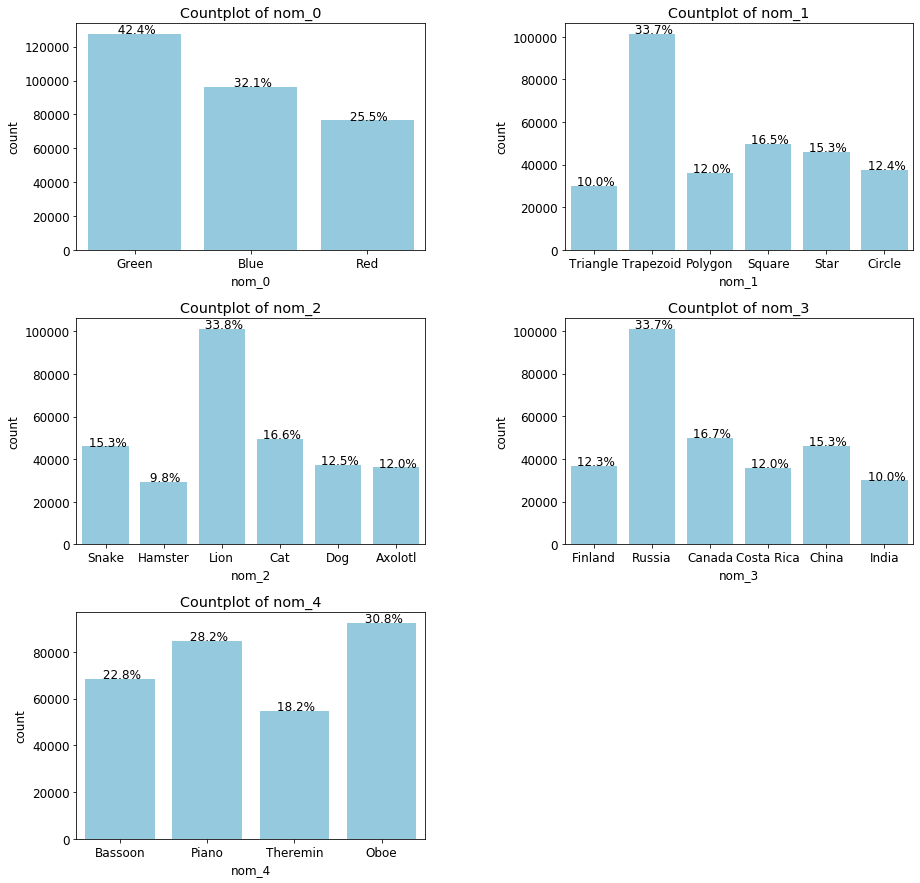

In [33]:
# 각 피처별 고유값의 비율 시각화 (앞에서 쓴 코드 활용)
## gridspec을 활용하면 몇 행 몇 열의 그래프를 지정해줄 수 있다. grid를 인덱싱해서!
import matplotlib.gridspec as gridspec

# nom_0~nom_4까지만 리스트 
nom_list = [f'nom_{i}' for i in range(5)]

plt.figure(figsize = (15, 15))
plt.subplots_adjust(wspace = 0.4, hspace = 0.3) #각 ax별 간격 (w: 좌우, h: 상하 여백)
grid = gridspec.GridSpec(3, 2)

for ind, col in enumerate(nom_list):
    # 특정 ax에 그래프를 그림
    ax = plt.subplot(grid[ind])
    sns.countplot(x = col, data = train, ax = ax, color = 'skyblue')
    
    #text는 앞에서 만든 함수 활용
    write_text(ax, len(train))
    
    # 각 ax에 제목 달아주기
    ax.set_title(f'Countplot of {col}')

plt.rc('font', size = 10)
plt.show()

#### 해석
- nom_0(색상): green > blue > red
- nom_1(도형): trapezoid 압도적으로 높음
- nom_2(동물): lion 압도적 높음
- nom_3(국가): russia 압도적 높음
- nom_4(악기): Oboe > Piano > bassoon > theremin

In [34]:
train['nom_5'].value_counts()

f7821e391    2801
06eeaf0aa    2750
472efea17    2729
20b10a832    2725
b97f51ac4    2717
             ... 
91c80026f      64
88f104c00      59
f802a9849      46
1fd0233cd      41
f710fca39      26
Name: nom_5, Length: 222, dtype: int64

- 나머지 `nom_5 ~ nom_9`는 정체불명의 알파벳+숫자 조합으로 되어있고, 이런 변수의 고유값 개수가 100개가 넘어간다.  
    - 그래서 사용을 어떻게 해야할지 고민,, 우선 고유값이 많아 시각화는 어렵다
        - 개수가 엄청 많은 (1천개 이상) 고유값만 냅두고 개수가 적은거는 전부 통일..? 
        - 혹은 일단은 이 변수도 쓰되 ML 성능개선 하는 과정에서 얘네를 삭제했을 때는 성능이 어떻게 변화하는지 확인하는 방법도!

### 3-2. `nom_*` 변수와 target 간 관계
이번에는 nom_* 들과 target 간의 관계를 확인할 수 있는 그래프를 그려보자.

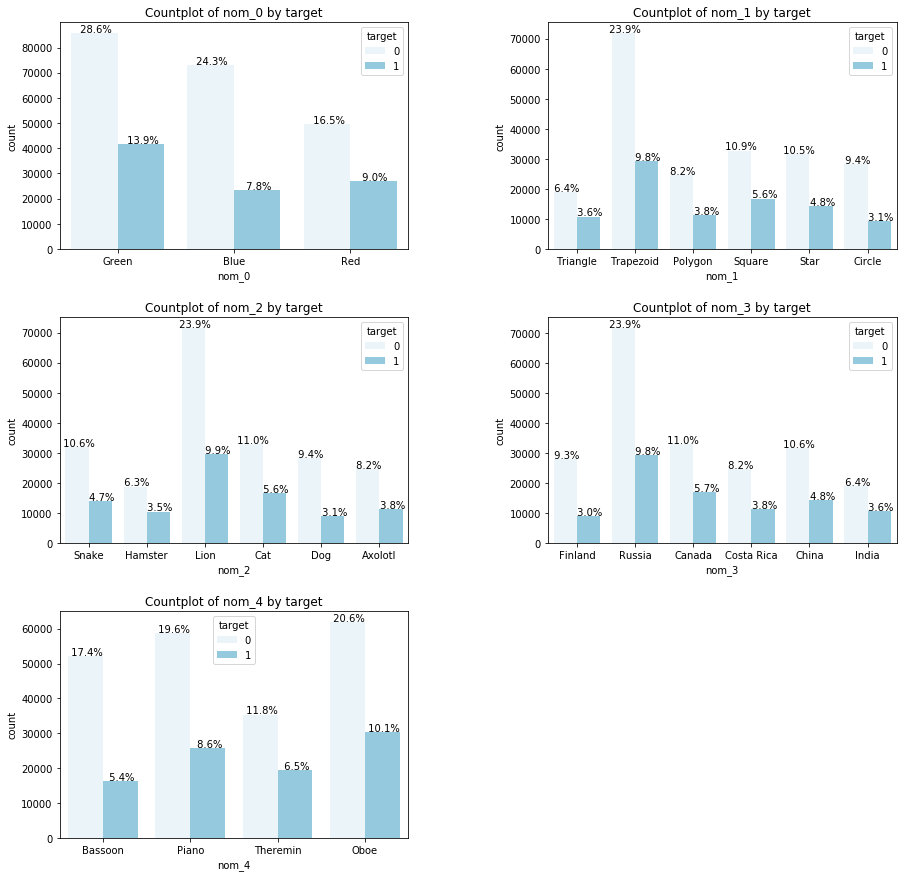

In [35]:
# 각 열별/target별 고유값의 비율 시각화 (앞에서 쓴 코드 활용)

plt.figure(figsize = (15, 15))
plt.subplots_adjust(wspace = 0.4, hspace = 0.3) #각 ax별 간격 (w: 좌우, h: 상하 여백)
grid = gridspec.GridSpec(3, 2)

for ind, col in enumerate(nom_list):
    # 특정 ax에 그래프를 그림
    ax = plt.subplot(grid[ind])
    sns.countplot(x = col, data = train, hue = 'target', ax = ax, color = 'skyblue')
    
    #text는 앞에서 만든 함수 활용
    write_text(ax, len(train))
    
    # 각 ax에 제목 달아주기
    ax.set_title(f'Countplot of {col} by target')
    
plt.rc('font', size = 12)
plt.show()

#### 통계의 함정
위의 그래프처럼 나타내도 좋지만, nom_* 변수들은 이진변수와 다르게 고유값이 3개 이상이다.  
그래서 비율값은 전체 100% 를 전부 다 쪼개서 한 plot에 나타낸 것이므로, `한 plot 내의 비율을 모두 더하면 100%가 된다.`  

그런데, 이렇게 nom_* & target을 알아보는 이유가 뭘까? -> **바로, target에 큰 영향을 주는 변수가 있는지? 를 알고 싶은 것!**  
위의 방식으로 본다면 비율이 월등하게 큰 고유값들(예를 들어 trapezoid, russia 등)이 개수가 많으니까, target이 1인 비율도 타 고유값에 비해 높게 나올 거라는 것.(실제로는 다른 고유값이 1의 비율이 높을수도 있는데!)  
예를 들어보면..

In [36]:
print(train.loc[train['nom_1'] == 'Trapezoid']['target'].value_counts() / len(train.loc[train['nom_1'] == 'Trapezoid']))

0    0.709946
1    0.290054
Name: target, dtype: float64


In [37]:
print(train.loc[train['nom_1'] == 'Triangle']['target'].value_counts() / len(train.loc[train['nom_1'] == 'Triangle']))

0    0.639022
1    0.360978
Name: target, dtype: float64


위의 경우 `nom_1` 변수의 고유값 중 고유값이 Trapezoid와 Triangle만 쏙 뽑아서, target이 0 or 1인 비율을 구한 것이다.  
- Trapezoid가 target이 1인 비율은 고작 29%  
- Triangle의 target이 1인 비율은 36%  

왜 이런 결과가 나오냐 하면 Trapezoid의 개수가 너무 많기 때문.

In [38]:
print(train.loc[train['nom_1'] == 'Trapezoid']['target'].value_counts())

0    71833
1    29348
Name: target, dtype: int64


In [39]:
print(train.loc[train['nom_1'] == 'Triangle']['target'].value_counts())

0    19078
1    10777
Name: target, dtype: int64


#### 개수와 비율의 차이점
이처럼 Trapezoid의 개수는 총 약 10만개이고 Triangle 개수는 총 약 3만개이다.  
`개수` Trapezoid 내의 target==1인 것은 3만개, Triangle 내 target==1인 것은 1만개이므로 전체 plot에선 Trapezoid가 target 1을 갖고있는 비율이 더 크다고 나온 것(실제로 3만개를 갖고있으니 1만개보다 많으니까!)  

`비율` 하지만 개수가 아닌 비율로 본다면, Trapezoid들 중에서 1인 것은 29%, Triangle 중에서 1인 것은 36%이므로 target == 1을 더 잘 예측할 수 있는 고유값은 Triangle인 것이다.  
=> 이렇게 nom_0~nom_4 변수들에 대해 이런 식으로 고유값별 target이 1인 비율이 얼마인지 알아보자!

### [pandas] 교차분석표(cross-tab) 활용하기
범주형 데이터 2개를 비교분석할 때 사용되는 표. 고유값별 target == 1인 비율 구하는 게 목적

In [40]:
pd.crosstab(train['nom_0'], train['target'])
# 결과는 이렇게 빈도(개수)로 나온다

target,0,1
nom_0,,
Blue,72914,23252
Green,85682,41659
Red,49640,26853


In [41]:
# 우리가 구하고자 하는 건 "비율"이므로 옵션 변경
    # 인덱스(index) 기준 정규화 : 이 크로스탭에서 index는 nom_0이다. 
pd.crosstab(train['nom_0'], train['target'], normalize = 'index')

target,0,1
nom_0,,
Blue,0.758210,0.241790
Green,0.672855,0.327145
Red,0.648948,0.351052


In [42]:
pd.crosstab(train['nom_0'], train['target'], normalize = 'index')*100 #백분율 

target,0,1
nom_0,,
Blue,75.820976,24.179024
Green,67.285478,32.714522
Red,64.894827,35.105173


In [43]:
# 앞으로 nom_0 ~ nom_5 피처에 대해 계속 크로스탭 생성할 것이므로 함수화
def get_crosstab(df, feature):
    cross = pd.crosstab(df[feature], df['target'], normalize = 'index')*100
    cross.reset_index(inplace = True)
    return cross

In [44]:
# 적용
get_crosstab(train, 'nom_0')

target,nom_0,0,1
0,Blue,75.820976,24.179024
1,Green,67.285478,32.714522
2,Red,64.894827,35.105173


### 시각화
각 피처별 고유값의 비율 + 고유값별 target = 1의 비율 을 나타낸다.(이중축 활용)  
- 왼쪽 축: 각 피처별 고유값 countplot & 비율 표시
- 오른쪽 축: 각 피처별 고유값이 target = 1에 대해 갖는 비율 표시 (pointplot)

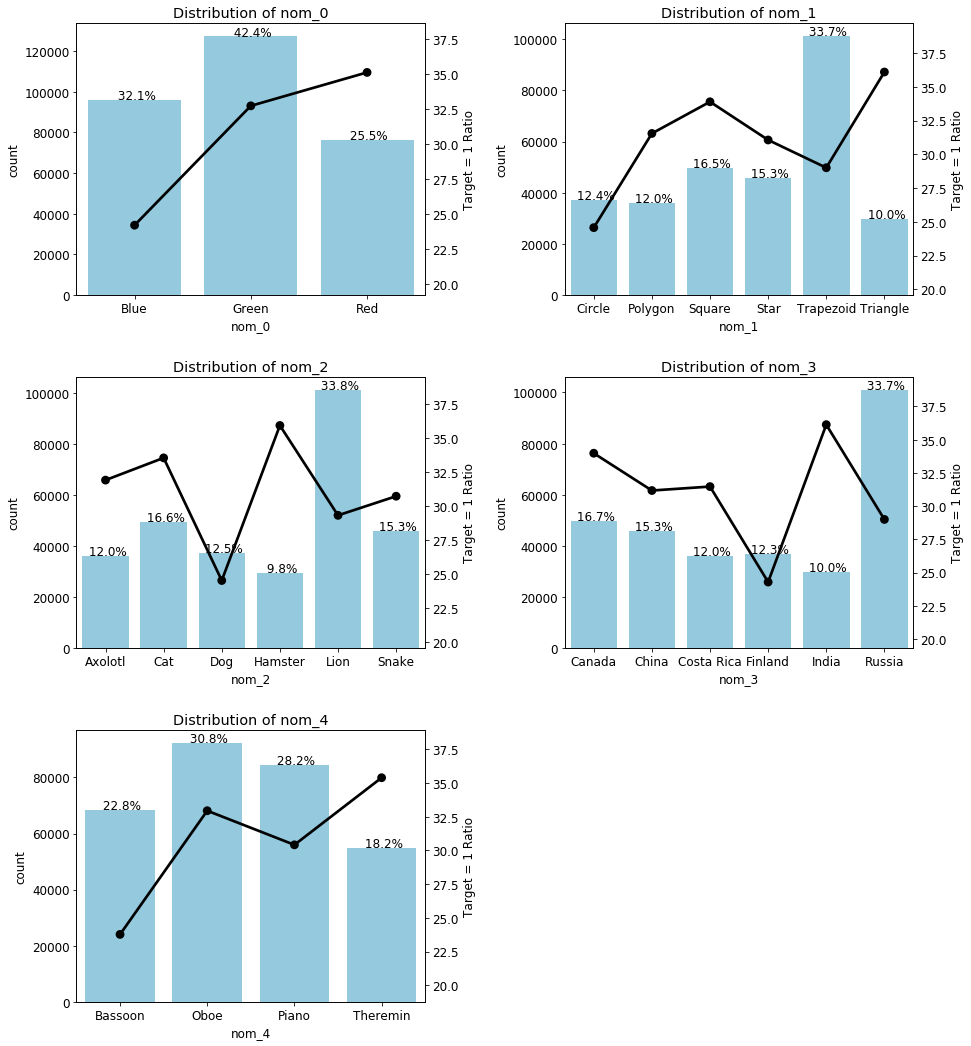

In [45]:
import matplotlib.gridspec as gridspec

# nom_0~nom_4까지만 리스트 
nom_list = [f'nom_{i}' for i in range(5)]

plt.figure(figsize = (15, 18))
plt.subplots_adjust(wspace = 0.4, hspace = 0.3) #각 ax별 간격 (w: 좌우, h: 상하 여백)
grid = gridspec.GridSpec(3, 2)


#------------------------ 왼쪽 축 (앞 코드와 동일)
for ind, col in enumerate(nom_list):
    # 크로스탭 생성
    ct = get_crosstab(train, col)
    
    # 특정 ax에 그래프를 그림
    ax = plt.subplot(grid[ind])
    sns.countplot(x = col, data = train, ax = ax, color = 'skyblue', order = ct[col].values) #order 꼭 맞추기!!!
    
    #text는 앞에서 만든 함수 활용
    write_text(ax, len(train))
    
    # 각 ax에 제목 달아주기
    ax.set_title(f'Distribution of {col}')
    
    
#----------------------- 오른쪽 축(new!)
    # 이중 축 생성후 pointplot을 그림 
    ax2 = ax.twinx()
    ax2 = sns.pointplot(x = ct[col], y = ct[1], color = 'black', order = ct[col].values) # order 꼭 맞추기!!!
    
    # y축 범위 설정
    ax2.set_ylim(ct[1].min()-5, ct[1].max()*1.1)
    
    # y축 이름 달아주기
    ax2.set_ylabel('Target = 1 Ratio')



plt.rc('font', size = 10)
plt.show()

(주의) ax와 ax2에 **order** 옵션 똑같이 맞춰야 함!!! 안그럼 고유값들이 다 섞임 ㅠㅠ  
#### 해석
신기하게도 피처별로 가장 값이 많은 고유값이 target = 1을 갖고 있는 비율은 가장 낮았다!  
- nom_1 : Green이 가장 많은 고유값이지만 target = 1이 가장 많은 고유값은 Red
- nom_2: Trapezoid가 가장 많은 고유값이나 target = 1은 Triangle이 가장 많음
- and so on..  

-> 이렇게 target = 1의 비율이 고유값별로 완전히 다르게 나타난다는 것은 (가장 개수가 많은 고유값과 target = 1 비율이 많은 고유값이 서로 다름)  
`target에 대해 변별력을 갖추고 있다는 것!` 아주 좋은 피처들이다.

In [46]:
# 앞으로 뒤의 ord_*, day, month도 위의 그래프를 그릴 것이므로 함수로 저장

def draw_two_ratio_plot(fea_list, df, row_num, col_num, size = (15, 18)):
    import matplotlib.gridspec as gridspec

    plt.figure(figsize = size)
    plt.subplots_adjust(wspace = 0.4, hspace = 0.3) #각 ax별 간격 
    grid = gridspec.GridSpec(row_num, col_num)

    #------------------------ 왼쪽 축
    for ind, col in enumerate(fea_list):
        # 크로스탭 생성
        ct = get_crosstab(df, col)
    
        # 특정 ax에 그래프를 그림
        ax = plt.subplot(grid[ind])
        sns.countplot(x = col, data = df, ax = ax, color = 'skyblue', order = ct[col].values)
    
        #text는 앞에서 만든 함수 활용
        write_text(ax, len(df))
    
        # 각 ax에 제목 달아주기
        ax.set_title(f'Distribution of {col}')
    
    
    #----------------------- 오른쪽 축
        # 이중 축 생성후 pointplot을 그림 
        ax2 = ax.twinx()
        ax2 = sns.pointplot(x = ct[col], y = ct[1], color = 'black', order = ct[col].values) # ct[1] 은 target =1 의 비율 
    
        # y축 범위 설정 - 좀 넉넉하게 잡아줌 
        ax2.set_ylim(ct[1].min()-5, ct[1].max()*1.1)
    
        # y축 이름 달아주기
        ax2.set_ylabel('Target = 1 Ratio')


    plt.rc('font', size = 10)
    plt.show()

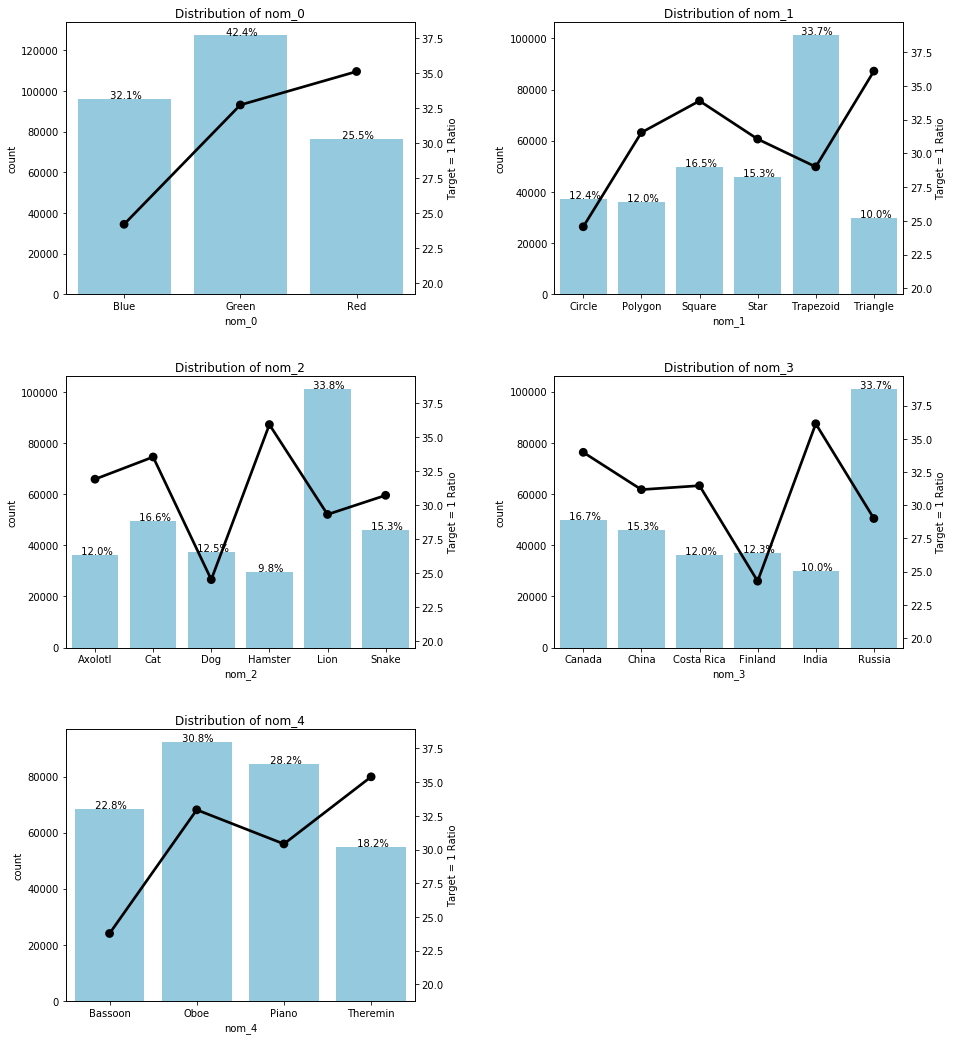

In [47]:
draw_two_ratio_plot(nom_list, train, 3, 2)

## 4. ord_* 변수
이 변수는 순서형 변수로, 각 변수별 고유값이 서로 순서(순위)를 가진다.

In [48]:
# 먼저 ord를 포함하는 변수만 뽑아보자 
train.columns[train.columns.str.contains('ord')]

Index(['ord_0', 'ord_1', 'ord_2', 'ord_3', 'ord_4', 'ord_5'], dtype='object')

In [49]:
ord_col = train.columns[train.columns.str.contains('ord')]
train[ord_col]

,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5
id,,,,,,
0,2,Grandmaster,Cold,h,D,kr
1,1,Grandmaster,Hot,a,A,bF
2,1,Expert,Lava Hot,h,R,Jc
3,1,Grandmaster,Boiling Hot,i,D,kW
4,1,Grandmaster,Freezing,a,R,qP
...,...,...,...,...,...,...
299995,1,Contributor,Freezing,k,K,dh
299996,2,Novice,Freezing,h,W,MO
299997,3,Novice,Boiling Hot,o,A,Bn


In [50]:
# 고유값 추출 -> 다행히 ord_5를 제외하면 엄청 많진 않군,,
for ind, col in enumerate(ord_col):
    print(col, '의 고유값의 수는: ', train[col].nunique())
    print(col, '의 고유값은: ', train[col].unique())
    print()

ord_0 의 고유값의 수는:  3
ord_0 의 고유값은:  [2 1 3]

ord_1 의 고유값의 수는:  5
ord_1 의 고유값은:  ['Grandmaster' 'Expert' 'Novice' 'Contributor' 'Master']

ord_2 의 고유값의 수는:  6
ord_2 의 고유값은:  ['Cold' 'Hot' 'Lava Hot' 'Boiling Hot' 'Freezing' 'Warm']

ord_3 의 고유값의 수는:  15
ord_3 의 고유값은:  ['h' 'a' 'i' 'j' 'g' 'e' 'd' 'b' 'k' 'f' 'l' 'n' 'o' 'c' 'm']

ord_4 의 고유값의 수는:  26
ord_4 의 고유값은:  ['D' 'A' 'R' 'E' 'P' 'K' 'V' 'Q' 'Z' 'L' 'F' 'T' 'U' 'S' 'Y' 'B' 'H' 'J'
 'N' 'G' 'W' 'I' 'O' 'C' 'X' 'M']

ord_5 의 고유값의 수는:  192
ord_5 의 고유값은:  ['kr' 'bF' 'Jc' 'kW' 'qP' 'PZ' 'wy' 'Ed' 'qo' 'CZ' 'qX' 'su' 'dP' 'aP'
 'MV' 'oC' 'RL' 'fh' 'gJ' 'Hj' 'TR' 'CL' 'Sc' 'eQ' 'kC' 'qK' 'dh' 'gM'
 'Jf' 'fO' 'Eg' 'KZ' 'Vx' 'Fo' 'sV' 'eb' 'YC' 'RG' 'Ye' 'qA' 'lL' 'Qh'
 'Bd' 'be' 'hT' 'lF' 'nX' 'kK' 'av' 'uS' 'Jt' 'PA' 'Er' 'Qb' 'od' 'ut'
 'Dx' 'Xi' 'on' 'Dc' 'sD' 'rZ' 'Uu' 'sn' 'yc' 'Gb' 'Kq' 'dQ' 'hp' 'kL'
 'je' 'CU' 'Fd' 'PQ' 'Bn' 'ex' 'hh' 'ac' 'rp' 'dE' 'oG' 'oK' 'cp' 'mm'
 'vK' 'ek' 'dO' 'XI' 'CM' 'Vf' 'aO' 'qv' 'jp' 'Zq' 'Qo' 'DN' 'T

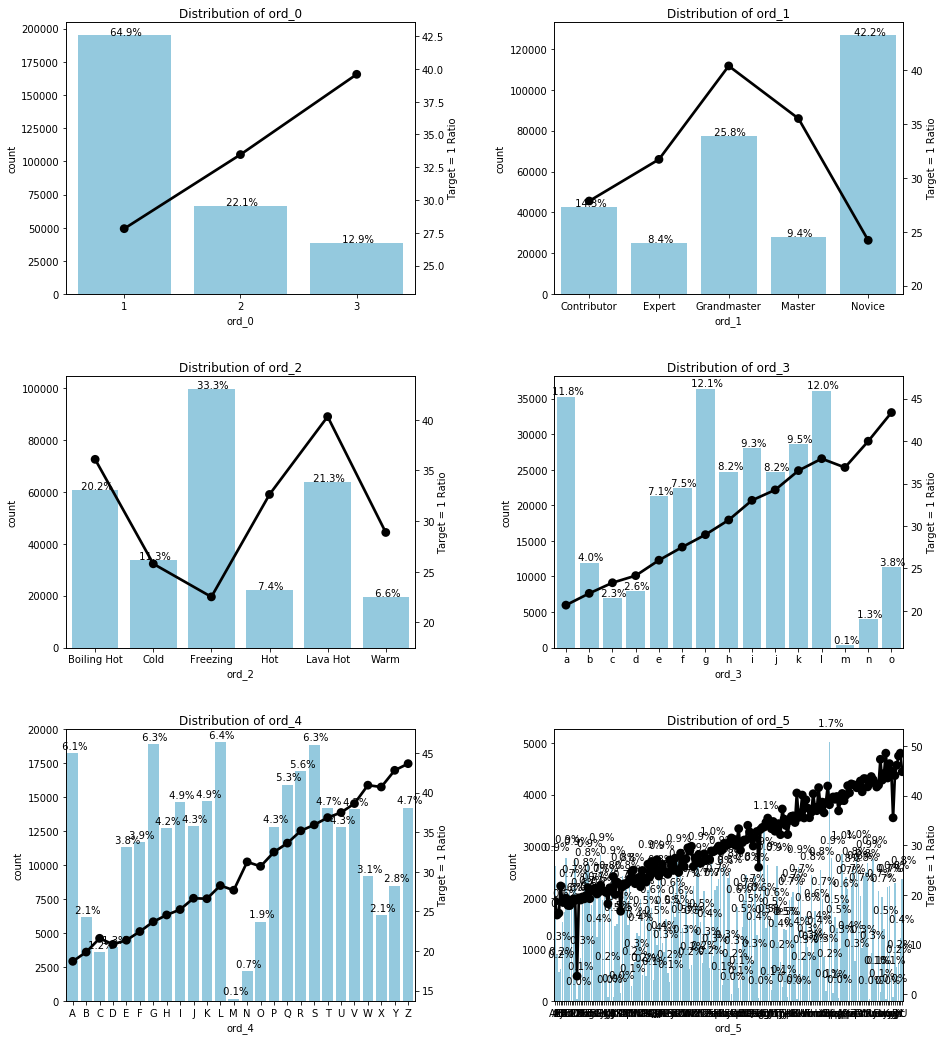

In [51]:
# 앞에서 만든 함수를 그대로 적용해 변수별 고유값의 수와 target = 1인 비율을 뽑아본다 
draw_two_ratio_plot(ord_col, train, 3, 2)

#### [Pandas] 순서형 변수의 고유값 순서 정하기: `CategoricalDtype(categories, ordered)`
순서형 변수는 고유값별 "순위"가 있으므로 이를 꼭 지켜줘야 한다.   
- categories: 범주형 데이터 타입으로 인코딩할 값 목록
- ordered: True 로 설정 시 categories에 전달한 값 순서 유지

In [52]:
# ord 변수들 순서 지정하기 - ord1, ord2만 (나머지는 숫자랑 알파벳이라서)
from pandas.api.types import CategoricalDtype

ord1 = ['Novice', 'Contributor', 'Expert', 'Master', 'Grandmaster']
ord2 = ['Freezing', 'Cold', 'Warm', 'Hot', 'Boiling Hot', 'Lava Hot']

ord1_d = CategoricalDtype(categories = ord1, ordered = True)
ord2_d = CategoricalDtype(categories = ord2, ordered = True)

# 실제로 변경: astype으로 타입 변경 
train['ord_1'] = train['ord_1'].astype(ord1_d)
train['ord_2'] = train['ord_2'].astype(ord2_d)

print(train[ord_col].dtypes)

ord_0       int64
ord_1    category
ord_2    category
ord_3      object
ord_4      object
ord_5      object
dtype: object


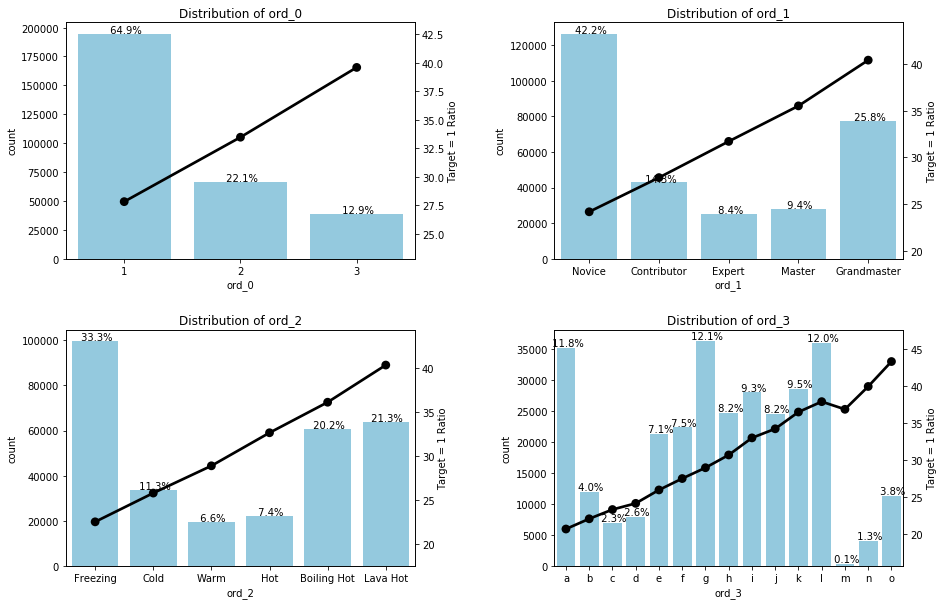

In [53]:
# 다시 그래프 적용(ord 0~3)
ord0to3 = ['ord_0', 'ord_1', 'ord_2', 'ord_3']
draw_two_ratio_plot(ord0to3, train, 2, 2, size = (15, 10))

#### 해석
우선은 변수별 고유값들을 보면 우리가 원하는 대로 순서가 제대로 지정되었음!  
그리고 앞의 `nom_*` 변수들과 똑같이 개수 자체는 많은 고유값과 target = 1을 많이 가진 고유값이 큰 차이가 있었다.
    - 예를 들어 ord_1에서 `Novice`가 전체의 42%로 가장 다수를 차지하지만 target=1은 `Grandmaster`에서 약 40%로 가장 많았다.   
그리고 `ord_*` 변수들은 순서를 가지므로 고유값의 순서를 순위대로 나타냈는데, **순위가 뒤로 갈수록 target = 1 비율이 상승하는 관계**

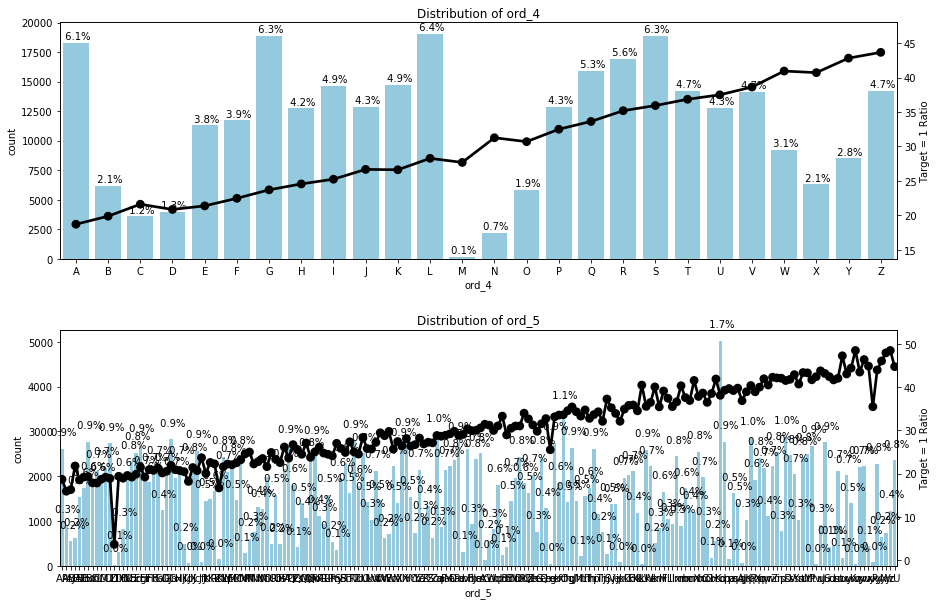

In [54]:
# ord_4 ~ ord_5 그래프 적용
ord4to5 = ['ord_4', 'ord_5']
draw_two_ratio_plot(ord4to5, train, 2, 1, size = (15, 10))

역시 앞의 그래프와 마찬가지로 순위가 뒤로 갈수록 target=1의 비율이 높아지는 경향을 보인다.  
-> `결론` ord_* 변수들도 쓸만하다!!

## 5. day & month 변수
day와 month는 날짜변수로, 각각 요일 및 월을 나타낸다.

In [55]:
train[['day', 'month']].dtypes

day      int64
month    int64
dtype: object

In [56]:
# 고유값 추출 
daynmth = ['day', 'month']
for ind, col in enumerate(daynmth):
    print(col, '의 고유값은: ', sorted(train[col].unique()))

day 의 고유값은:  [1, 2, 3, 4, 5, 6, 7]
month 의 고유값은:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


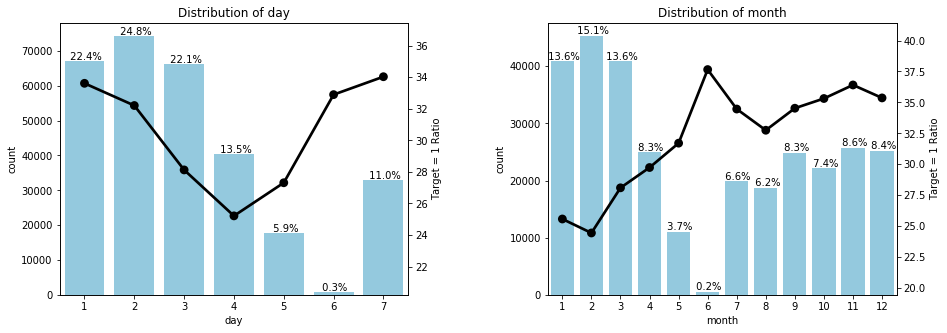

In [57]:
# 그래프 함수 적용
draw_two_ratio_plot(daynmth, train, 1, 2, size = (15, 5))

#### 해석
역시 앞의 ord_* 변수들과 마찬가지로 절대적인 개수가 많은 고유값과 target = 1 비율이 높은 고유값이 일치하지 않음  
-> day, month도 유의미한 변수!